In [169]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [146]:
user = pd.read_csv("takehome_users.csv", encoding='latin-1')

In [147]:
user.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [148]:
user_engagement = pd.read_csv("takehome_user_engagement.csv", encoding='latin-1')

In [149]:
user_engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [150]:
user_engagement.describe()

,user_id,visited
count,207917.000000,207917.0
mean,5913.314197,1.0
std,3394.941674,0.0
min,1.000000,1.0
25%,3087.000000,1.0
50%,5682.000000,1.0
75%,8944.000000,1.0
max,12000.000000,1.0


In [151]:
user_engagement.dtypes

time_stamp    object
user_id        int64
visited        int64
dtype: object

In [152]:
user_engagement['time_stamp'] = pd.to_datetime(user_engagement['time_stamp'])

In [153]:
user_engagement['time_stamp'].min(),user_engagement['time_stamp'].max()

(Timestamp('2012-05-31 08:20:06'), Timestamp('2014-06-06 14:58:50'))

In [154]:
user_engagement = user_engagement.set_index("time_stamp")

In [155]:
user_engagement.head()

,user_id,visited
time_stamp,,
2014-04-22 03:53:30,1,1
2013-11-15 03:45:04,2,1
2013-11-29 03:45:04,2,1
2013-12-09 03:45:04,2,1
2013-12-25 03:45:04,2,1


In [156]:
user_engagement.isnull().sum()

user_id    0
visited    0
dtype: int64

In [157]:
user.isnull().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64

In [158]:
user['invited_by_user_id'].fillna(0,inplace=True)

In [159]:
user.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [163]:
from datetime import timedelta

def label_adopted(x):    
    "takes a users input and returns whether or not they have been active within any 7-day period"
    df_temp = user_engagement[user_engagement['user_id'] == x] #select out rows of this user
    df_temp = df_temp.resample('D').mean().dropna() #resample to show if active in a day. .mean() is just of 1
    adopted = 0
    for i in range(len(df_temp)-2): #loop over active days till the second to last day
        if df_temp.index[i + 2] - df_temp.index[i] <= timedelta(days=7): # difference between every 1st and 3rd day
            adopted = 1
            break
        else:
            adopted = 0
    return adopted

In [164]:
#apply to user df to label users as adopted=true 
user['adopted'] = user['object_id'].apply(label_adopted)

In [165]:
print(sum(user['adopted']))
print(sum(user.adopted)/len(user.adopted) * 100)

1656
13.8


In [170]:
# set creation_time
user.creation_time = pd.to_datetime(user.creation_time)
#last_session_creation_time is a unix time stamp, so use map to convert to datetime
user['last_session_creation_time'] = user['last_session_creation_time'].map(lambda data: 
                                    datetime.datetime.fromtimestamp(int(data)).strftime('%Y-%m-%d %H:%M:%S'),
                                                                              na_action='ignore')

In [174]:
user.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-21 23:53:30,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-30 23:45:04,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 19:14:52,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 04:09:28,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 05:14:20,0,0,193,5240.0,0


In [175]:
# Create new feature - time from account created and last login
user['last_session_creation_time'] = pd.to_datetime(user['last_session_creation_time'])
user['UsageTime'] = user['last_session_creation_time'] - user['creation_time']

In [188]:
user['UsageTime'] = [x.total_seconds() for x in user['UsageTime']]

user['UsageTime'] = user['UsageTime'].fillna(0)

In [ ]:
# Drop unneccessary columns
col_drop = ['email','last_session_creation_time','creation_time','name','object_id']
user.drop(columns=col_drop,inplace=True)

In [190]:
dffeature = user

In [191]:
from sklearn.preprocessing import LabelEncoder
Enc = LabelEncoder()
creation_labels = Enc.fit_transform(user['creation_source'])
dffeature.creation_source = creation_labels

creation_labels = Enc.fit_transform(user['org_id'])
dffeature.org_id = creation_labels

creation_labels = Enc.fit_transform(user['invited_by_user_id'])
dffeature.invited_by_user_id = creation_labels



In [192]:
dffeature

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,UsageTime
0,0,1,0,11,2325,0,-14400.0
1,1,0,0,1,56,1,11736000.0
2,1,0,0,94,298,0,-14400.0
3,0,0,0,1,1104,0,72000.0
4,0,0,0,193,1127,0,414000.0
...,...,...,...,...,...,...,...
11995,1,0,0,89,1802,0,-14400.0
11996,4,0,0,200,0,0,414000.0
11997,0,1,1,83,1764,0,-14400.0
11998,2,0,0,6,0,0,158400.0


In [193]:
# Random forest would be best model since the dataset is small and it contains categorical column

In [198]:
from sklearn.model_selection import train_test_split

#set up data by seperating out the labels, then split for cross validation
X = dffeature.drop('adopted', axis=1)
y = dffeature.adopted

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [200]:
from sklearn.ensemble import RandomForestClassifier

#train and test classifier
rf = RandomForestClassifier(class_weight='balanced_subsample')

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

In [202]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score


print(classification_report(y_test, y_pred))

cm= confusion_matrix(y_test,y_pred)
print('confusion matrix:')
print(cm)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2063
           1       0.92      0.89      0.90       337

    accuracy                           0.97      2400
   macro avg       0.95      0.94      0.94      2400
weighted avg       0.97      0.97      0.97      2400

confusion matrix:
[[2037   26]
 [  38  299]]


In [203]:
accuracy_score(y_test, y_pred)*100

97.33333333333334

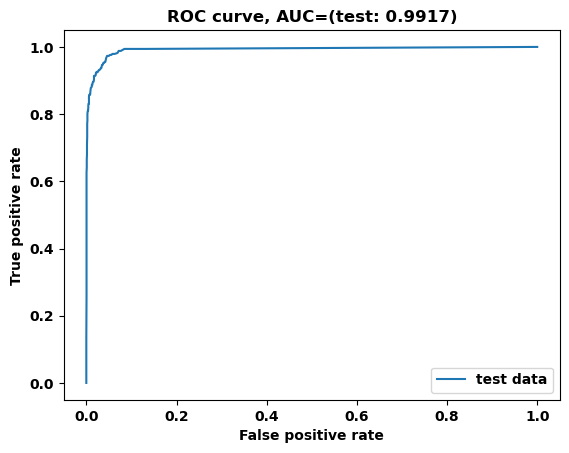

In [206]:
from sklearn.metrics import roc_curve,auc, precision_recall_curve
#calculate ROC and plot the curve and check with eval result
y_pred_proba_test = rf.predict_proba(X_test)
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_proba_test[:, 1])
auc_test = auc(fpr_test, tpr_test)
plt.title(f"ROC curve, AUC=(test: {auc_test:.4f})")
plt.plot(fpr_test, tpr_test, label="test data")

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()

# The Metrics of Final Model :

    1) Test accuracy - 97.33 %
    2) AUC - 0.99

In [207]:
FeatureImp = pd.DataFrame(list(zip(X.columns, rf.feature_importances_)), columns = ['features', 'Importance'])
FeatureImp.sort_values(by='Importance', ascending=False)

,features,Importance
5,UsageTime,0.903069
3,org_id,0.054143
4,invited_by_user_id,0.025931
0,creation_source,0.011059
1,opted_in_to_mailing_list,0.003497
2,enabled_for_marketing_drip,0.002300


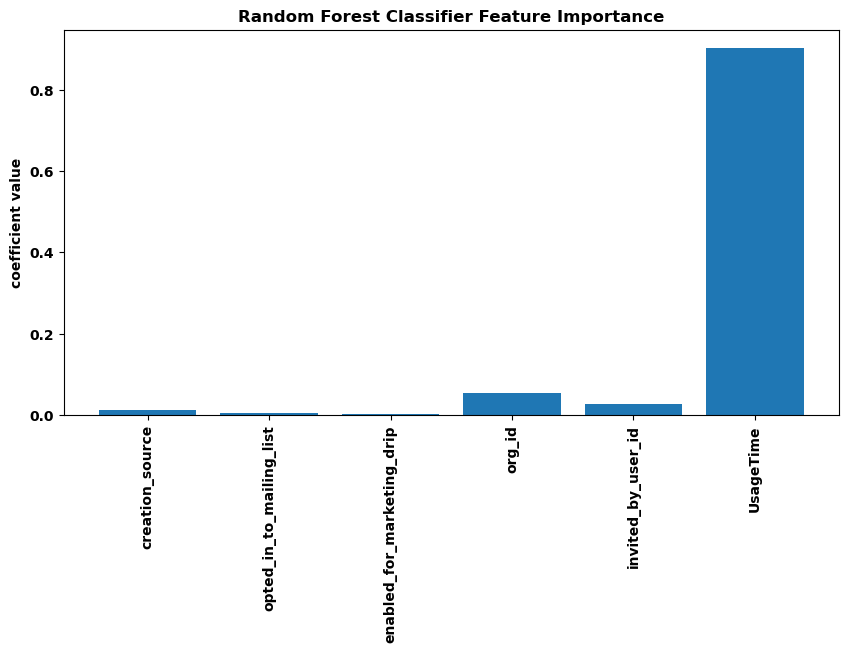

In [213]:

plt.figure(figsize=(10,5))
plt.bar(FeatureImp['features'],FeatureImp['Importance'])
plt.title('Random Forest Classifier Feature Importance')
plt.ylabel('coefficient value')
plt.xticks(rotation=90)
plt.show()


According to this analysis, RandomForestClassifer identified how long between when a user signed up and when their last active session to be the greatest indicator of whether or not they became an adopted user.